In [5]:
from keras import models, layers, optimizers, regularizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

#import warnings
#warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Data Preprocessing

In [60]:
train = pd.read_csv('stockTrainSet.csv')
test = pd.read_csv('stockTestSet.csv')

## Set target data
Set target as 

1: if next day's close price is "higher" than today's close price

0: if next day's close price is "lower" than today's close price

In [61]:
def addTarget(df):
    target = np.zeros(len(df))
    for i in range(len(df)-1):
        cur = df.iloc[i, 2]
        nxt = df.iloc[i+1, 2]

        if nxt >= cur:
            target[i] = 1
        else:
            target[i] = 0

    df['target'] = target

In [62]:
addTarget(train)
addTarget(test)

train.describe()

,Open Price,Close Price,High Price,Low Price,Volume,target
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000
mean,1656.142686,1656.767562,1664.427054,1647.425128,2.948755e+09,0.547261
std,485.292193,485.226120,484.808706,485.576116,1.351675e+09,0.497871
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08,0.000000
25%,1238.602500,1239.337500,1246.695000,1227.587500,2.048980e+09,0.000000
50%,1649.135000,1650.405000,1656.145000,1639.600000,2.506637e+09,1.000000
75%,2070.300000,2071.190000,2079.507500,2058.757500,3.373334e+09,1.000000
max,2692.710000,2690.160000,2694.970000,2685.920000,9.120100e+09,1.000000


## Feature Selection
- Open Price
- Close Price	
- High Price	
- Low Price
- Volume


In [63]:
train_x = train.drop(columns=["Date", "target"])
train_y = train["target"]
#train_y = np.array(train_y, dtype=int)

test_x = test.drop(columns=["Date", "target"])
test_y = test["target"]
#test_y = np.array(test_y, dtype=int)

## Normalization
Since different features may use different scales, normalization can help learning algorithms be more effective

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
_ = lr_model.fit(train_x_std, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy rate is very low.

In [66]:
lr_predict = lr_model.predict(test_x_std)
print(accuracy_score(test_y, lr_predict))

0.5238095238095238


## Improve my classifier <a class="tocSkip">

## SGD Classifier
When given the parameter loss="log", SGD Classifier is a
incrementally trained logistic regression.

In [67]:
from sklearn import linear_model

SGDlr_model = linear_model.SGDClassifier(loss='log',
                                         max_iter=1000,
                                         tol=1e-3)
_ = SGDlr_model.fit(train_x_std, train_y)

The accuracy rate didn't change, it's still low

In [68]:
SGDlr_predict = SGDlr_model.predict(test_x_std)
print(accuracy_score(test_y, SGDlr_predict))

0.5238095238095238


# SVM(Support Vector Machine)

In [69]:
from sklearn.svm import SVC

svm_model = SVC()
_ = svm_model.fit(train_x_std, train_y)

The accuracy is also very low.

In [70]:
svm_predict = svm_model.predict(test_x_std)
print(accuracy_score(test_y, svm_predict))

0.5238095238095238


## Improve my classifier <a class="tocSkip">
## Change kernel to sigmoid
The result didn't change, it's still 0.5238

In [71]:
svm_model = SVC(kernel="sigmoid")
_ = svm_model.fit(train_x_std, train_y)

svm_predict = svm_model.predict(test_x_std)
print(accuracy_score(test_y, svm_predict))

0.5238095238095238


## Change kernel to poly
The result is still same

In [72]:
svm_model = SVC(kernel="poly")
_ = svm_model.fit(train_x_std, train_y)

svm_predict = svm_model.predict(test_x_std)
print(accuracy_score(test_y, svm_predict))

0.5238095238095238


## Change degree to 4
The result is still same

In [73]:
svm_model = SVC(kernel="poly", degree=4)
_ = svm_model.fit(train_x_std, train_y)

svm_predict = svm_model.predict(test_x_std)
print(accuracy_score(test_y, svm_predict))

0.5238095238095238


# Neural Network
Construct a neueal network without any hidden layer, and choose relu as activation function

In [74]:
model = models.Sequential()
model.add(layers.Dense(units=1,
                       input_dim=train_x.shape[1], 
                       activation='relu'))

In [75]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [76]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_y)
                                               ,train_y)

history = model.fit(train_x_std, 
                    train_y, 
                    epochs=10,
                    batch_size=32,
                    class_weight=class_weight)

Epoch 1/10
2264/2264 [==============================] - 0s 123us/step - loss: 5.5897 - acc: 0.4351
Epoch 2/10
2264/2264 [==============================] - 0s 24us/step - loss: 2.4199 - acc: 0.4589
Epoch 3/10
2264/2264 [==============================] - 0s 23us/step - loss: 0.8932 - acc: 0.5146
Epoch 4/10
2264/2264 [==============================] - 0s 22us/step - loss: 0.6930 - acc: 0.5340
Epoch 5/10
2264/2264 [==============================] - 0s 27us/step - loss: 0.6891 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 25us/step - loss: 0.6882 - acc: 0.5411
Epoch 7/10
2264/2264 [==============================] - 0s 24us/step - loss: 0.6892 - acc: 0.5495
Epoch 8/10
2264/2264 [==============================] - 0s 23us/step - loss: 0.6892 - acc: 0.5437
Epoch 9/10
2264/2264 [==============================] - 0s 24us/step - loss: 0.6896 - acc: 0.5442
Epoch 10/10
2264/2264 [==============================] - 0s 27us/step - loss: 0.6897 - acc: 0.5442


252/252 [==============================] - 0s 15us/step
Training accuracy: 0.5490282687618538
Testing accuracy: 0.5198412684221116


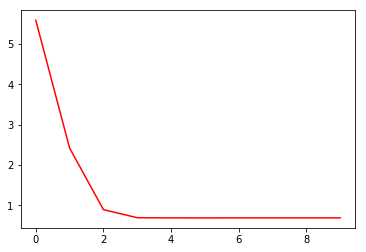

In [77]:
train_acc = model.evaluate(train_x_std, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x_std, test_y, batch_size=32)[1]

print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [78]:
nn_pred = model.predict_classes(test_x_std)
print(accuracy_score(test_y, nn_pred))

0.5198412698412699


## Improve my classifier <a class="tocSkip">
## Add two hidden layers

In [83]:
model = models.Sequential()
model.add(layers.Dense(units=10,
                       input_dim=train_x.shape[1], 
                       activation='relu'))

model.add(layers.Dense(units=20,
                       activation='relu'))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))


model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(lr=0.01),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2264/2264 [==============================] - 0s 195us/step - loss: 0.6951 - acc: 0.5322
Epoch 2/10
2264/2264 [==============================] - 0s 35us/step - loss: 0.6921 - acc: 0.5398
Epoch 3/10
2264/2264 [==============================] - 0s 40us/step - loss: 0.6906 - acc: 0.5459
Epoch 4/10
2264/2264 [==============================] - 0s 37us/step - loss: 0.6901 - acc: 0.5468
Epoch 5/10
2264/2264 [==============================] - 0s 36us/step - loss: 0.6897 - acc: 0.5477
Epoch 6/10
2264/2264 [==============================] - 0s 41us/step - loss: 0.6901 - acc: 0.5433
Epoch 7/10
2264/2264 [==============================] - 0s 38us/step - loss: 0.6902 - acc: 0.5473
Epoch 8/10
2264/2264 [==============================] - 0s 32us/step - loss: 0.6890 - acc: 0.5473
Epoch 9/10
2264/2264 [==============================] - 0s 32us/step - loss: 0.6890 - acc: 0.5442
Epoch 10/10
252/252 [==============================] - 0s 17us/step
Training accuracy: 0.5472614842042485
Testing acc

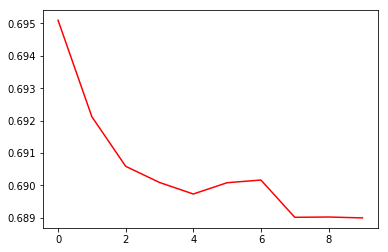

In [84]:
history = model.fit(train_x_std, 
                    train_y, 
                    epochs=10,
                    batch_size=32,
                    class_weight=class_weight)

train_acc = model.evaluate(train_x_std, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x_std, test_y, batch_size=32)[1]

print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [88]:
nn_pred = model.predict_classes(test_x_std)
print(accuracy_score(test_y, nn_pred))

0.5238095238095238


# Disscussion

Logistic Regression, SVM, and NN give the similiar accuracy rate, around 0.52, which is very low.

From my perspective, there are too many factors that affect rise and fall of stock price, such as internal developments within companies, impact of world events, inflation and interest rates. It's too complicated that nobody could precisely predict stock price. 

Needless to say that from the few features given in this task, it's impossible to predict. And so that no matter which model I use or how I tried to imporve it, the result is similiar.

What's more, if I could predict stock price precisely, I will not be writing FDA homework here now lol

# Another Data set

### I choose [Titanic Dataset](https://www.kaggle.com/c/titanic/data)  <a class="tocSkip">
    
    
### Data Preprocessing
map sex to 1 and 0

fill the missing data in age

In [100]:
df = pd.read_csv('titanicTrainSet.csv')
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked','Fare'], axis = 1)

age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /age.count()
df['Age'].fillna(avgage, inplace = True)

sex_map = {'male' : 0, 'female' :1}
df['Sex'] = df['Sex'].map(sex_map)

In [101]:
train_x = df[:700].drop('Survived', 1)
train_y = df['Survived'][:700]

test_x = df[700:].drop('Survived', 1)
test_y = df['Survived'][700:]

### normalization

In [102]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## Logistic Regression

In [131]:
lr_model = LogisticRegression()
_ = lr_model.fit(train_x_std, train_y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
lr_predict = lr_model.predict(test_x_std)
print(accuracy_score(test_y, lr_predict))

0.806282722513089


## SVM

In [136]:
svm_model = SVC(kernel='poly')
_ = svm_model.fit(train_x_std, train_y)

In [137]:
svm_predict = svm_model.predict(test_x_std)
print(accuracy_score(test_y, svm_predict))

0.8167539267015707


## Neural Network

In [151]:
model = models.Sequential()
model.add(layers.Dense(units=10,
                       input_dim=train_x.shape[1], 
                       activation='relu'))

model.add(layers.Dense(units=10, 
                       activation='relu'))

model.add(layers.Dense(units=1, 
                       activation='sigmoid'))

In [152]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
700/700 [==============================] - 1s 719us/step - loss: 0.6713 - acc: 0.6086
Epoch 2/10
700/700 [==============================] - 0s 47us/step - loss: 0.5403 - acc: 0.7843
Epoch 3/10
700/700 [==============================] - 0s 41us/step - loss: 0.4869 - acc: 0.8043
Epoch 4/10
700/700 [==============================] - 0s 45us/step - loss: 0.4642 - acc: 0.8071
Epoch 5/10
700/700 [==============================] - 0s 36us/step - loss: 0.4520 - acc: 0.8057
Epoch 6/10
700/700 [==============================] - 0s 33us/step - loss: 0.4467 - acc: 0.8000
Epoch 7/10
700/700 [==============================] - 0s 39us/step - loss: 0.4442 - acc: 0.8057
Epoch 8/10
700/700 [==============================] - 0s 36us/step - loss: 0.4407 - acc: 0.8100
Epoch 9/10
700/700 [==============================] - 0s 38us/step - loss: 0.4377 - acc: 0.8071
Epoch 10/10
191/191 [==============================] - 0s 26us/step
Training accuracy: 0.8099999993188041
Testing accuracy: 0.842931937

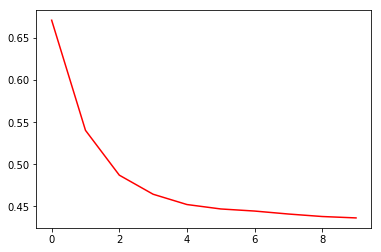

In [154]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_y)
                                               ,train_y)

history = model.fit(train_x_std, 
                    train_y, 
                    epochs=10,
                    batch_size=32,
                    class_weight=class_weight)

train_acc = model.evaluate(train_x_std, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x_std, test_y, batch_size=32)[1]

print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [155]:
nn_pred = model.predict_classes(test_x_std)
print(accuracy_score(test_y, nn_pred))

0.8429319371727748


## Discussion

### Compare with predicting stock price
In this data set, the accuracy rate is mush higher than predicting stock price in every model I used. From my perspective, the features in titanic affects more to the result, so it's better.


### Accuracy rate 
1. NN 0.8586387434554974
2. SVM 0.8167539267015707
3. Logistic Regression 0.806282722513089

NN's accuracy rate is the highest since it has most parameter among other models to adjust, so that it can fit better.